In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
from app.config import SampleRate, hop_length

2025-07-06 13:35:41.572899: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-06 13:35:41.581974: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-06 13:35:41.618067: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-06 13:35:41.661419: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751798141.728508    2466 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751798141.74

In [2]:
#### List the files ######
# Adjust these if needed
root_dir_train = 'data/pickles/training'
root_dir_test = 'data/pickles/test'

train_files = sorted(os.listdir(root_dir_train))
test_files = sorted(os.listdir(root_dir_test))

print("Train files:", train_files)
print("Test files:", test_files)

Train files: ['Bearing1_1_DF.pkl', 'Bearing1_2_DF.pkl', 'Bearing2_1_DF.pkl', 'Bearing2_2_DF.pkl', 'Bearing3_1_DF.pkl', 'Bearing3_2_DF.pkl']
Test files: ['Bearing1_3_DF.pkl', 'Bearing1_4_DF.pkl', 'Bearing2_3_DF.pkl', 'Bearing2_4_DF.pkl', 'Bearing3_3_DF.pkl']


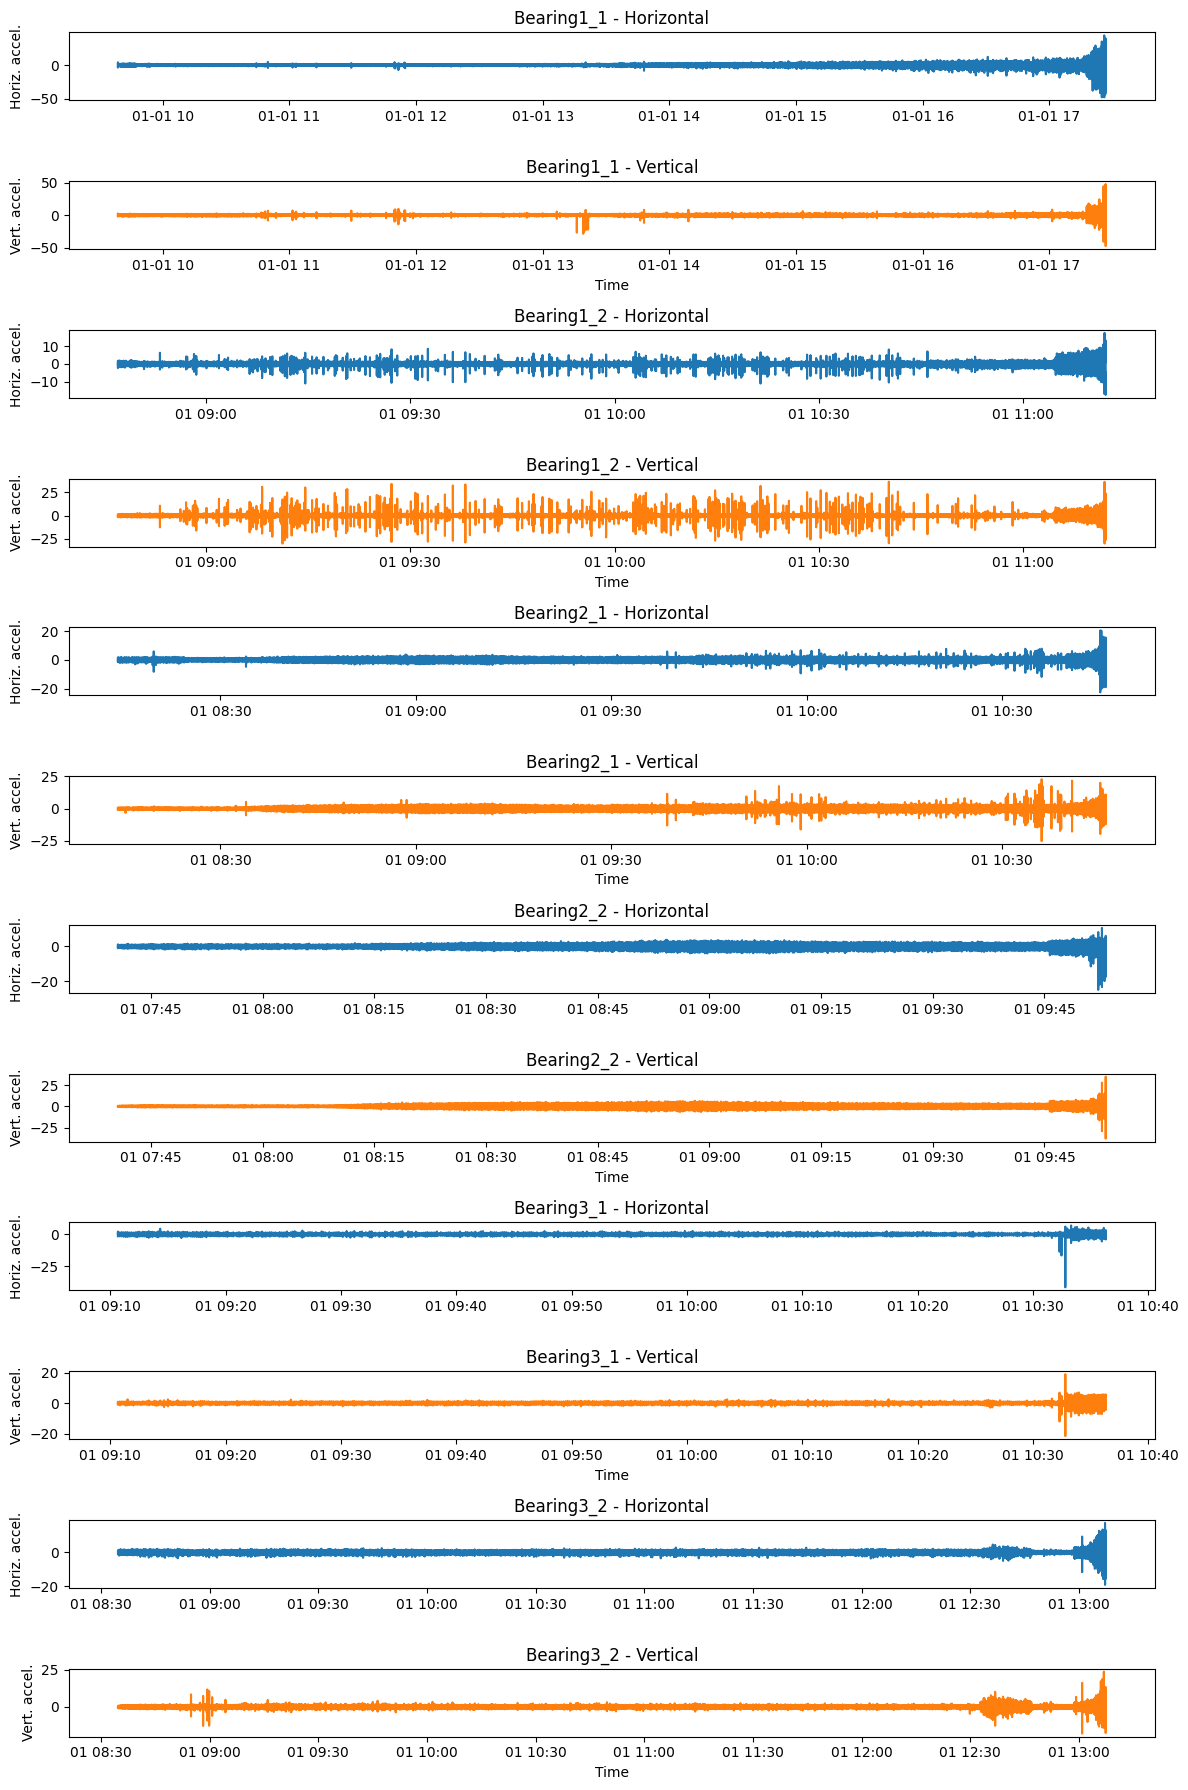

In [3]:
#### Plot the train files in the pronostia dataset!
files = train_files
root_dir = root_dir_train
num_files = len(files)

# Create figure: 2 subplots per file, stacked
fig, axs = plt.subplots(num_files * 2, 1, figsize=(12, 3*num_files), sharex=False)

if num_files == 0:
    print("No files found.")
else:
    for i, fname in enumerate(files):
        file_path = os.path.join(root_dir, fname)
        with open(file_path, 'rb') as f:
            df = pickle.load(f)
        
        # Top subplot for this file: Horizontal acceleration
        axs[i*2].plot(df['Time'], df['Horiz. accel.'], color='tab:blue')
        axs[i*2].set_ylabel('Horiz. accel.')
        axs[i*2].set_title(f"{fname[:10]} - Horizontal")
        
        # Bottom subplot for this file: Vertical acceleration
        axs[i*2 + 1].plot(df['Time'], df['Vert. accel.'], color='tab:orange')
        axs[i*2 + 1].set_ylabel('Vert. accel.')
        axs[i*2 + 1].set_title(f"{fname[:10]} - Vertical")
        axs[i*2 + 1].set_xlabel('Time')

    plt.tight_layout()
    plt.show()

In [4]:
#### Load one file and inspect #####
file_path = os.path.join(root_dir_train, files[4])

with open(file_path, 'rb') as f:
    df = pickle.load(f)

print(type(df))
print(df.head())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
                        Time  Horiz. accel.  Vert. accel.
0 1900-01-01 09:10:39.118790          0.338        -0.263
1 1900-01-01 09:10:39.118830          0.278         0.285
2 1900-01-01 09:10:39.118870          0.143         0.590
3 1900-01-01 09:10:39.118910          0.090        -0.193
4 1900-01-01 09:10:39.118940          0.035        -0.109
Index(['Time', 'Horiz. accel.', 'Vert. accel.'], dtype='object')


In [9]:
############## Plot raw signals of a single bearing!!!!#############
def plot_signals(df, title=None):
    fig, axs = plt.subplots(2, 1, figsize=(12, 5), sharex=True)
    axs[0].plot(df['Time'], df['Horiz. accel.'], color='tab:blue')
    axs[0].set_ylabel('Horizontal Accel.')
    axs[0].set_title(title or 'Horizontal and Vertical Acceleration vs Time')
    axs[1].plot(df['Time'], df['Vert. accel.'], color='tab:orange')
    axs[1].set_ylabel('Vertical Accel.')
    axs[1].set_xlabel('Time')
    plt.tight_layout()
    plt.show()

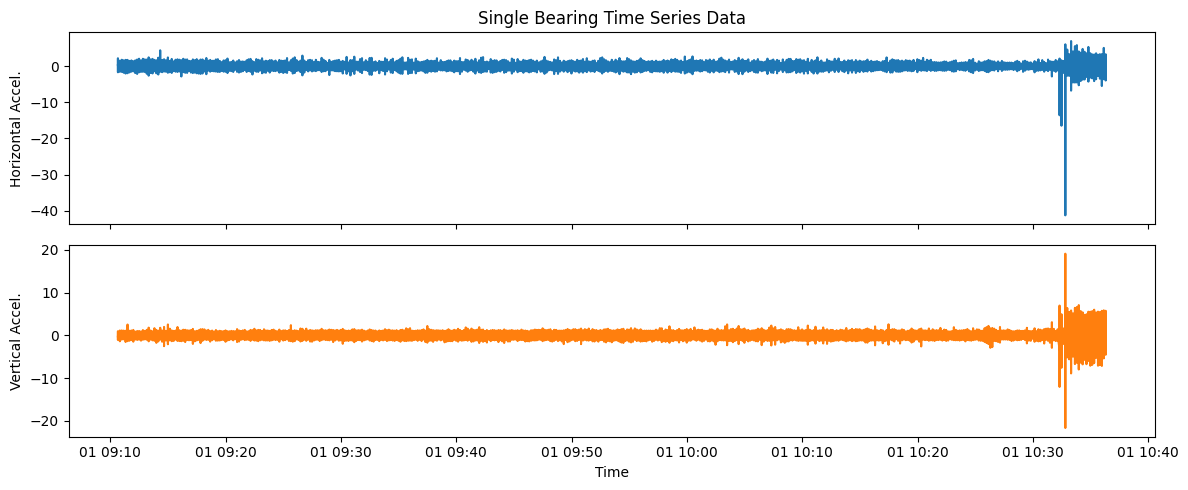

In [10]:
###### Plot raw signals from the first file ######
plot_signals(df, title='Single Bearing Time Series Data')

In [2]:
# Path to folder containing mel spectrogram .npy files!
mel_folder = 'data/features/mel_features/'  

# List all .npy files
mel_files = sorted([f for f in os.listdir(mel_folder) if f.endswith('.npy')])

print(f"Found {len(mel_files)} mel spectrogram files.")

Found 11 mel spectrogram files.


Bearing1_1_feat_mel_DB_256.npy: shape=(2803, 256, 2)


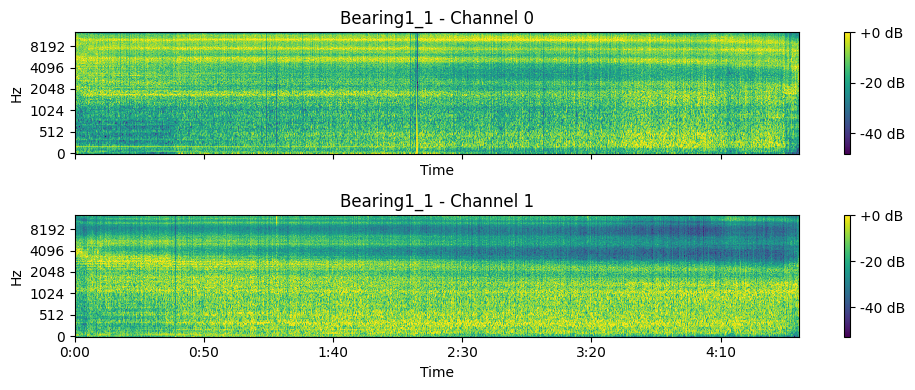

In [20]:
##### Loop through files and plot the mel spectrogram!!! ####
for fname in mel_files:
    file_path = os.path.join(mel_folder, fname)
    mel_spec_db = np.load(file_path)   # shape: (time, n_mels, 2)

    print(f"{fname}: shape={mel_spec_db.shape}")
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

    # Channel 0
    img0 = librosa.display.specshow(mel_spec_db[:, :, 0].T,   # transpose to (n_mels, time)
                                    sr=SampleRate, 
                                    hop_length=hop_length,
                                    x_axis='time', 
                                    y_axis='mel', 
                                    cmap='viridis',
                                    ax=axs[0])
    axs[0].set_title(f'{fname[:10]} - Channel 0')
    fig.colorbar(img0, ax=axs[0], format='%+2.0f dB')

    # Channel 1
    img1 = librosa.display.specshow(mel_spec_db[:, :, 1].T, 
                                    sr=SampleRate, 
                                    hop_length=hop_length,
                                    x_axis='time', 
                                    y_axis='mel', 
                                    cmap='viridis',
                                    ax=axs[1])
    
    axs[1].set_title(f'{fname[:10]} - Channel 1')
    fig.colorbar(img1, ax=axs[1], format='%+2.0f dB')

    plt.tight_layout()
    plt.show()
    break
    